# Problem Statement

The goal of this project is to predict hotel booking cancellations for the INN Hotel Group. By analyzing historical and current booking data, the aim is to identify patterns and factors influencing cancellations. This will help the hotel management improve customer retention, optimize revenue, and refine booking policies.

## Description

This case study involves the following steps:

### Data Loading:

Two datasets, INNHotelsGroup_newdata.csv and INNHotelsGroup_pastdata.csv, are loaded to analyze historical and current booking trends.

### Data Exploration:

Basic descriptive statistics are computed to understand the distribution of variables such as lead time, average price per room, and number of nights stayed.

A correlation heatmap is used to identify relationships between numerical features.

### Data Cleaning:

Outliers are identified in features like lead time, average price per room, and number of weeknights.

Missing values, if any, are handled appropriately.

### Feature Engineering:

Additional features are created based on the existing data to enhance predictive capabilities.

### Model Building:

A machine learning model is trained to predict the likelihood of a booking cancellation based on historical patterns.

### Model Evaluation:

The performance of the model is evaluated using metrics such as accuracy, precision, recall, and F1-score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading the Files

In [2]:
data_new = pd.read_csv('INNHotelsGroup_newdata.csv')
data_past = pd.read_csv('INNHotelsGroup_pastdata.csv')

In [3]:
data_past.shape

(27093, 12)

In [4]:
data_new.shape

(3583, 11)

In [5]:
data_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


### Descriptive Statistics

In [6]:
data_past.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


By Looking at this summary we can suspect outliers on the upper tail of lead time, avg price per room and no of week nights.

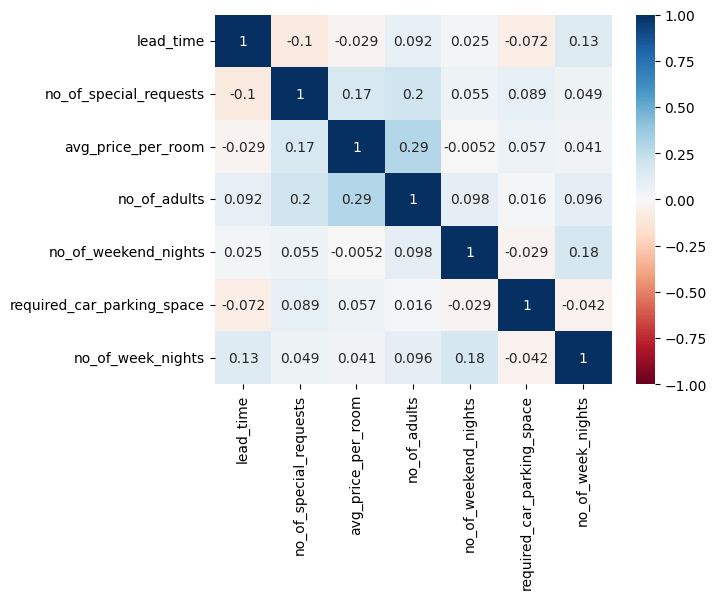

In [7]:
# Let us look the correlation plot as well
sns.heatmap(data_past.corr(numeric_only=True),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

Inference:
* There is some pos correlation bw avg_room_price and no of adults.
* weak Pos correlation bw no of special request and no of adults.
* weak Pos correlation bw no of week nights and weenend nights.
* weak pos correlation bw avg_rrom price and no of special request.

## Data Visualization and Data Preprocessing

### Removing Redundant columns

In [8]:
# Can you tell what % of cancelled booking were reeboked?
rebooked = data_past[data_past['booking_status']=='Canceled']['rebooked']

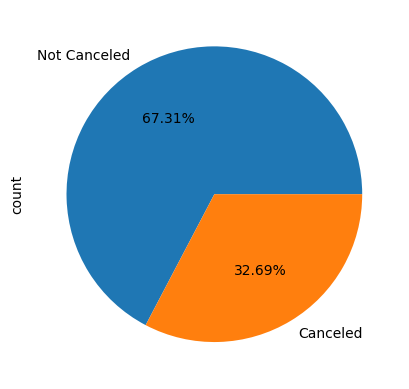

In [9]:
data_past['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

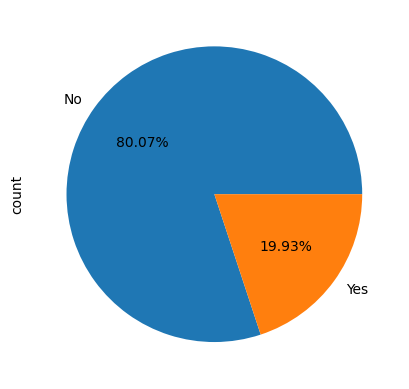

In [10]:
rebooked.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

Inference:
* There were 33% bookings which were cancelled at the last minute. Out of those 80% of the cancelled bookings were not rebooked. That is the main reason why comapany is incuring losses.

In [12]:
# Now we do not need the rebooked column in our analysis, hence we can drop it
data_past.drop(columns=['rebooked'],inplace=True)

KeyError: "['rebooked'] not found in axis"

In [13]:
# past data has to be used as training set and new data as test set
# For now we will store y_test in separate variable for doing validation later on.
# We also need to combine train and test data over here in order to preprocess. 

In [14]:
y_test = data_new['booking_status']
data_new.drop(columns=['booking_status'],inplace=True)

In [15]:
data = pd.concat([data_past,data_new],axis=0)

In [16]:
data.shape

(30676, 11)

In [17]:
data.isnull().sum()

booking_id                       0
lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
arrival_date                     0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
dtype: int64

In [18]:
# Drop Duplicated
data[data.duplicated()]

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30676 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  30676 non-null  object 
 1   lead_time                   30676 non-null  int64  
 2   market_segment_type         30676 non-null  object 
 3   no_of_special_requests      30676 non-null  int64  
 4   avg_price_per_room          30676 non-null  float64
 5   no_of_adults                30676 non-null  int64  
 6   no_of_weekend_nights        30676 non-null  int64  
 7   arrival_date                30676 non-null  object 
 8   required_car_parking_space  30676 non-null  int64  
 9   no_of_week_nights           30676 non-null  int64  
 10  booking_status              27093 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.8+ MB


In [20]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [21]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_weekday'] = data['arrival_date'].dt.weekday

In [22]:
data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,1,1,4


In [23]:
data.drop(columns=['arrival_date','booking_id'],inplace=True)

In [24]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


### Visualization

In [25]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [26]:
num_cols = ['lead_time','avg_price_per_room','arrival_day']
cat_cols = data.drop(columns=num_cols).columns

In [27]:
num_cols

['lead_time', 'avg_price_per_room', 'arrival_day']

In [28]:
cat_cols

Index(['market_segment_type', 'no_of_special_requests', 'no_of_adults',
       'no_of_weekend_nights', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'arrival_month',
       'arrival_weekday'],
      dtype='object')

#### Univariate Analysis

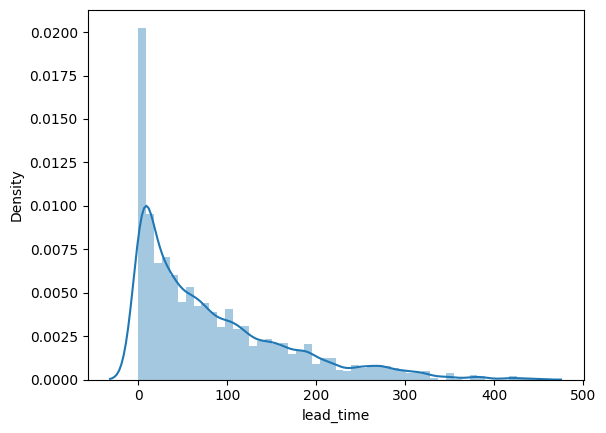

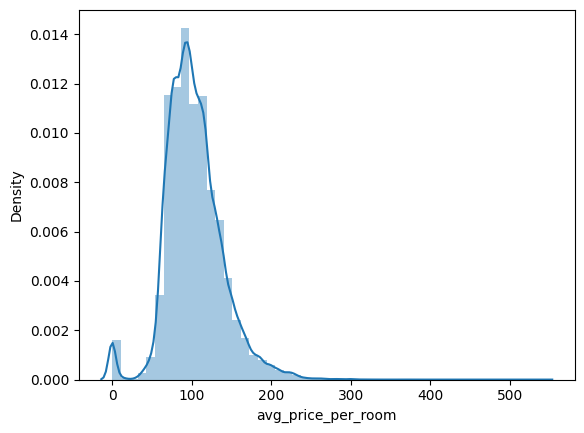

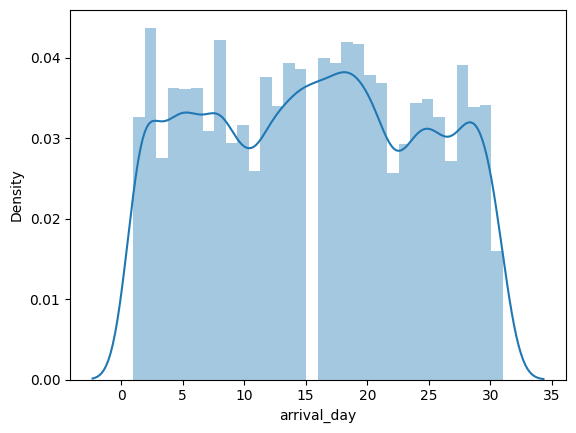

In [29]:
for i in num_cols:
    sns.distplot(data[i])
    plt.show()

Inference:
* Lead time is highly right skewed.
* Avg price is highly right skewed with 0 price in some entries.
* Although arrival day is almost uniform, but there is no data in 15th Day.

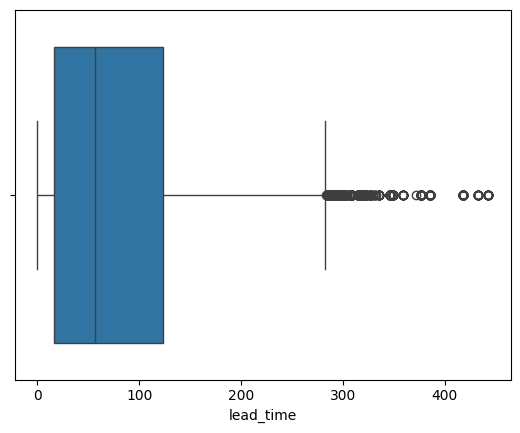

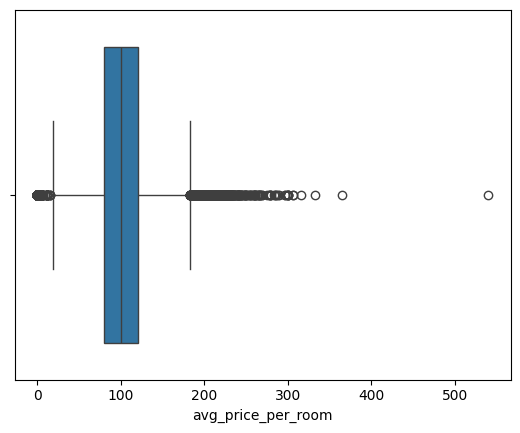

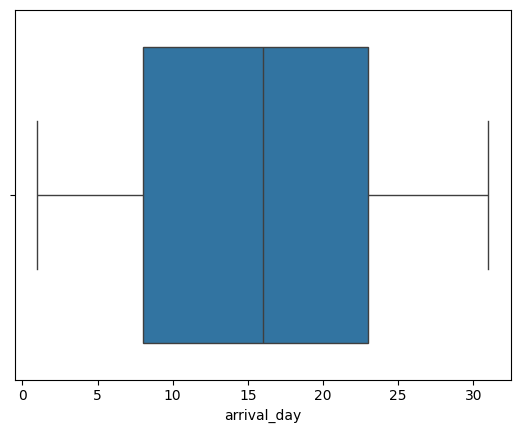

In [30]:
for i in num_cols:
    sns.boxplot(data[i],orient='h')
    plt.show()

Inference:
* There are extreme outliers in lead time and avg room price.

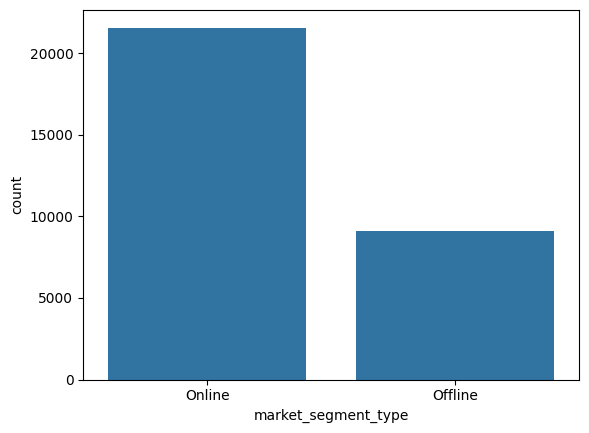

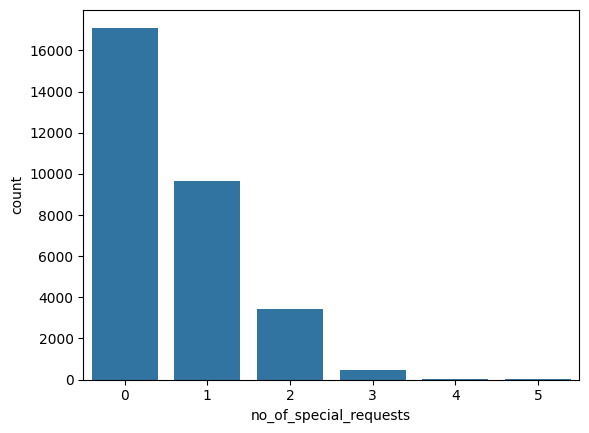

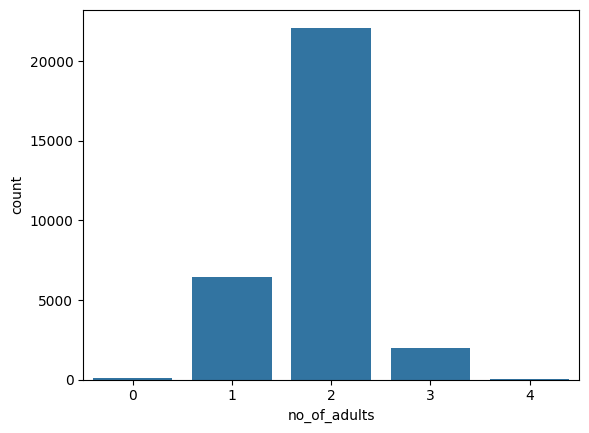

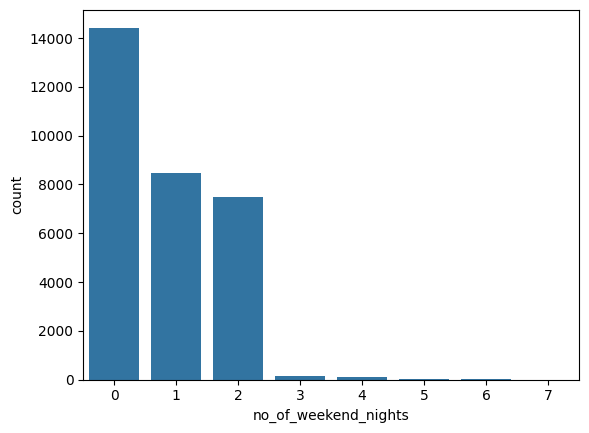

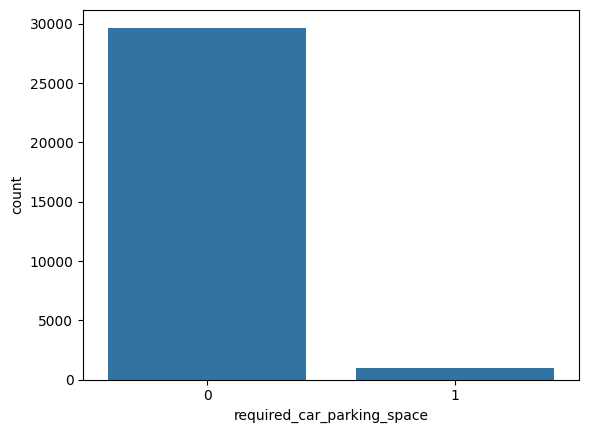

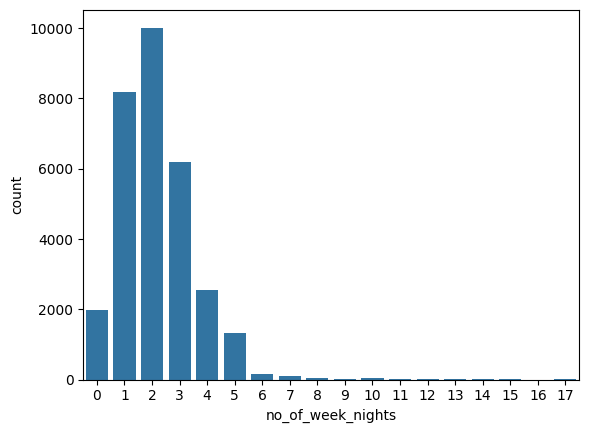

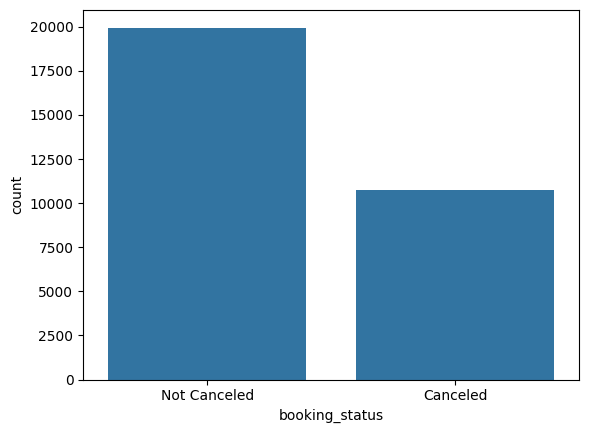

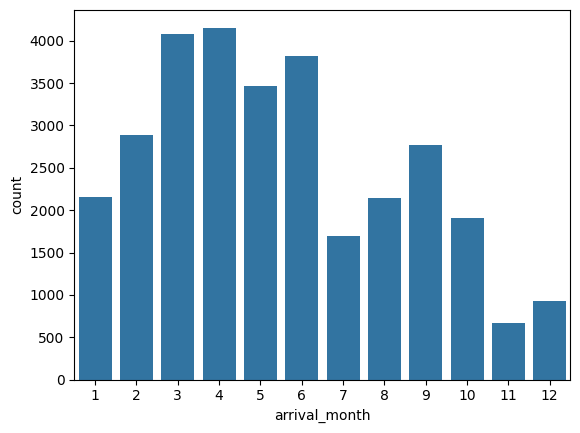

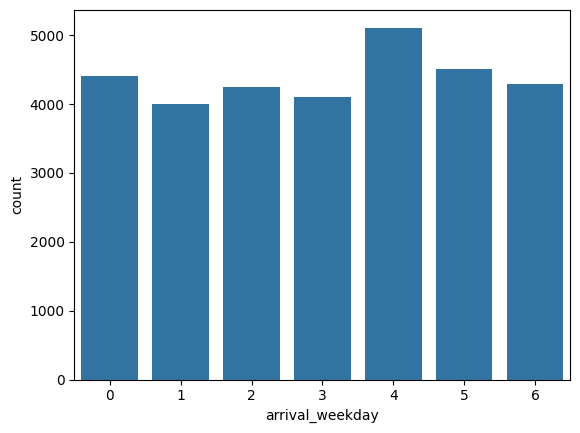

In [31]:
for i in cat_cols:
    sns.countplot(x=data[i])
    plt.show()

Inference:
* Most of the bookings are online.
* Either there are no spcl requests of 1 spcl requests in data.
* Most of the bookings have been made by couples.
* Most of customers have 0,1 or 2 weekend nights in their stay.
* Very few customers requested for car parking space.
* Very few customers are having more that 5 week nights in their stay.
* Maximum Arrivals are in month March and April and arrival day is Friday.

#### Bivariate Analysis

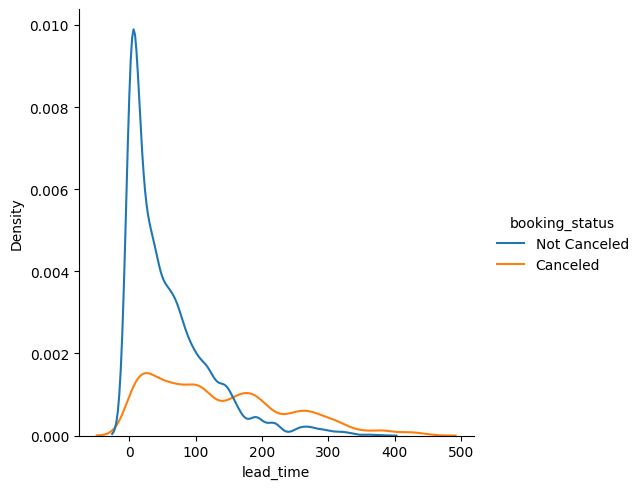

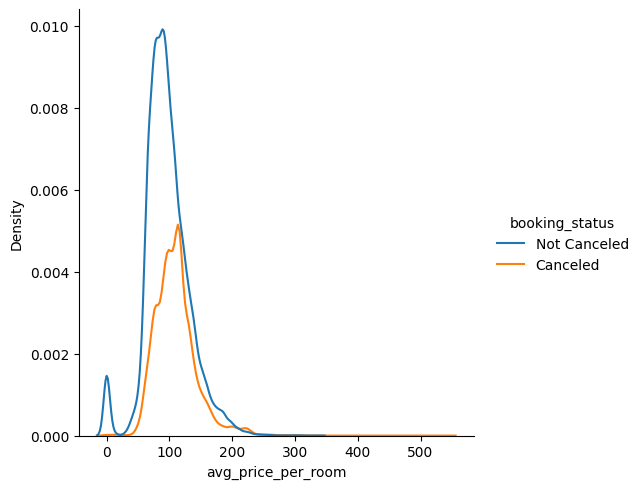

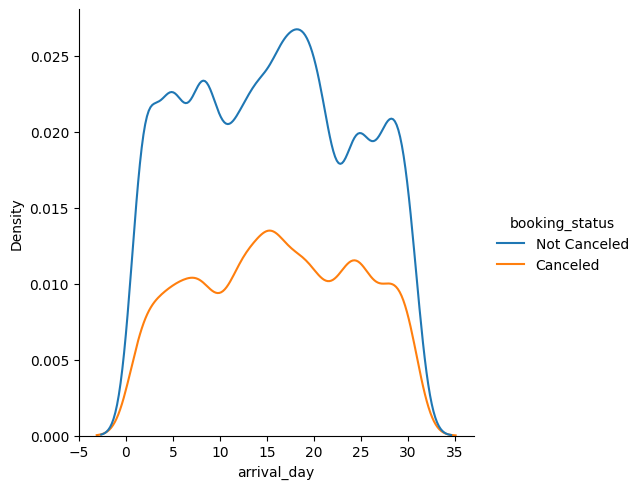

In [32]:
# Num vs cat
for i in num_cols:
    sns.displot(data = data,x=i,hue=data['booking_status'],kind='kde')
    plt.show()

Inference:
* In lead time and avg price for more extreme values the booking is canceled.

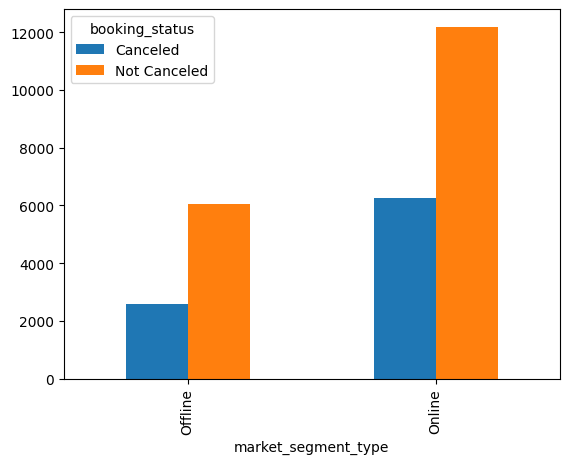

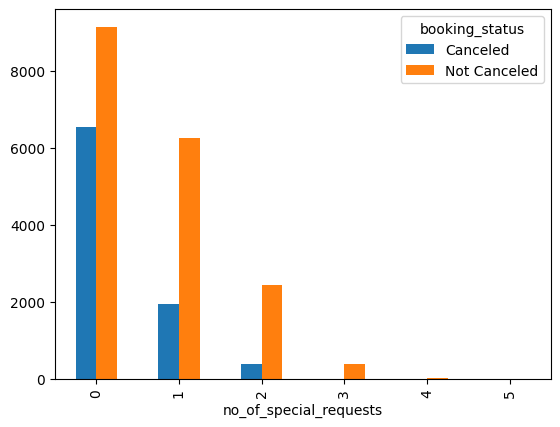

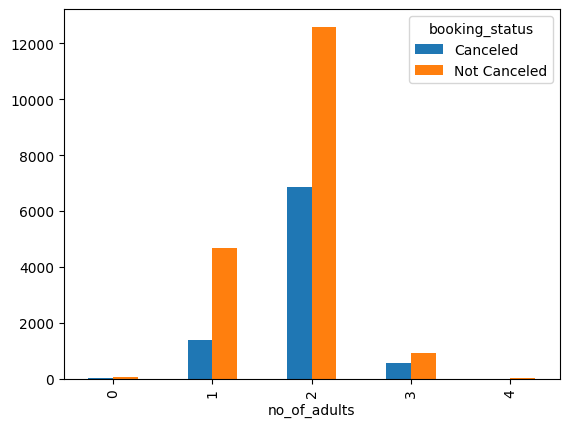

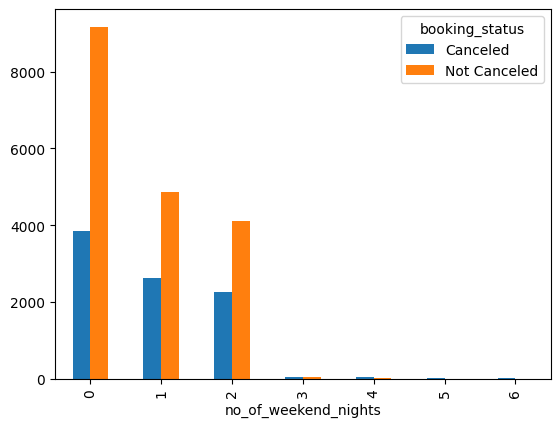

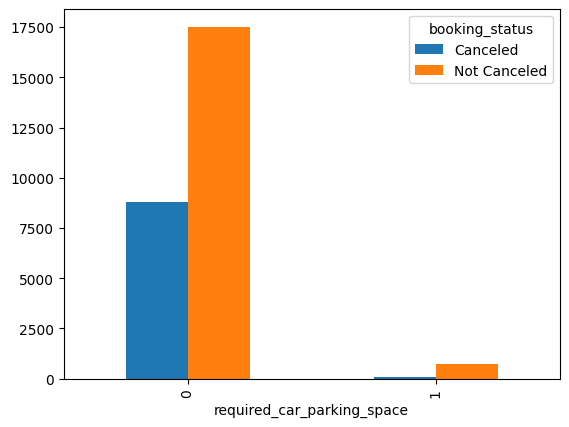

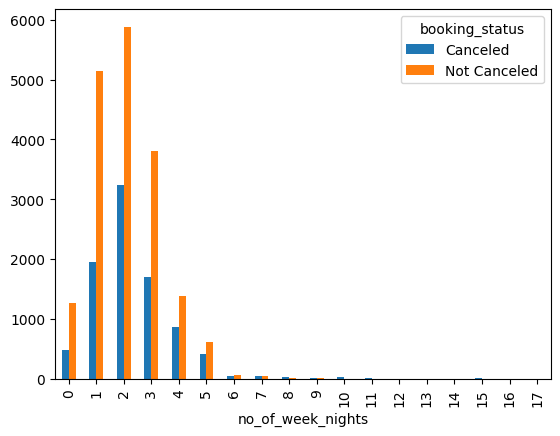

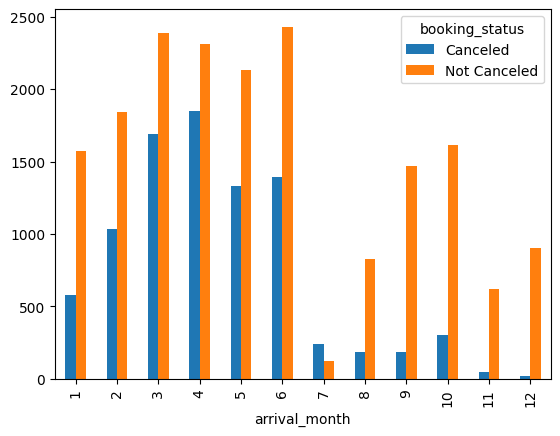

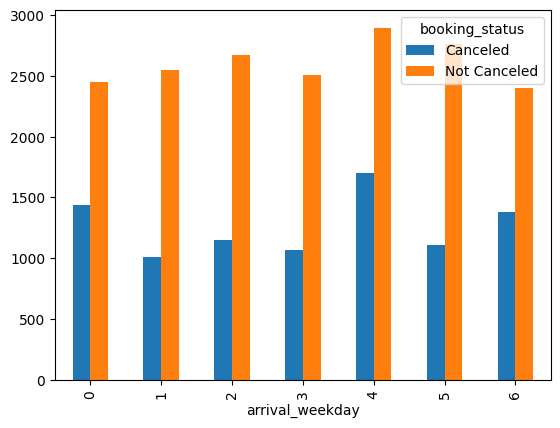

In [33]:
# cat vs cat
for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

### Missing Value Treatment

In [34]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
arrival_day                      0
arrival_month                    0
arrival_weekday                  0
dtype: int64

### Outlier Treatment

In [35]:
# We will treat outliers from train data only. As it might lead to data leakage.

### Encoding

In [36]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


In [37]:
# Online =1 Offline = 0
data['market_segment_type']= data['market_segment_type'].map({'Online':1,'Offline':0})

In [38]:
data['market_segment_type'].value_counts()

market_segment_type
1    21561
0     9115
Name: count, dtype: int64

In [39]:
# Cancelled = 1, not cancelled= 0
data['booking_status'] = data['booking_status'].map({'Canceled':1,'Not Canceled':0})

In [40]:
data['booking_status'].value_counts()

booking_status
0.0    18236
1.0     8857
Name: count, dtype: int64

In [41]:
y_test = y_test.map({'Canceled':1,'Not Canceled':0})

In [42]:
y_test.value_counts()

booking_status
0    2383
1    1200
Name: count, dtype: int64

In [43]:
data.dtypes

lead_time                       int64
market_segment_type             int64
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                float64
arrival_day                     int32
arrival_month                   int32
arrival_weekday                 int32
dtype: object

### Train test split

In [44]:
x_test = data[data['booking_status'].isnull()]

In [45]:
x_test.drop(columns=['booking_status'],inplace=True)

In [46]:
print(x_test.shape,y_test.shape)

(3583, 11) (3583,)


In [47]:
train = data[data['booking_status'].notnull()]

In [48]:
# Lets drop duplicates from train
train.drop_duplicates(inplace=True)

In [49]:
train.shape

(18655, 12)

In [50]:
# Cap the xtreme outliers

for i in ['lead_time', 'avg_price_per_room']:
    q3,q1 = np.quantile(train[i],[0.75,0.25])
    iqr = q3-q1
    ul, ll = q3+2.5*iqr,q1-2.5*iqr
    train[i] = np.where(train[i]>ul,ul,train[i])
    train[i] = np.where(train[i]<ll,ll,train[i])

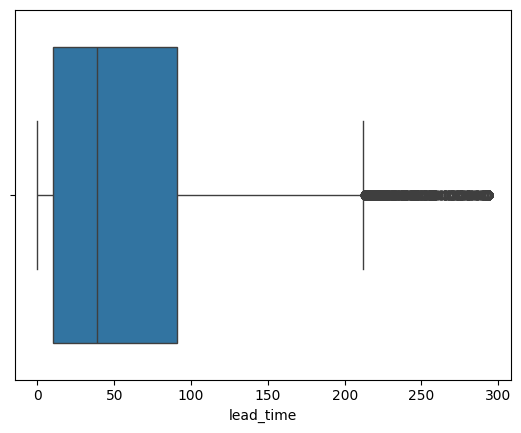

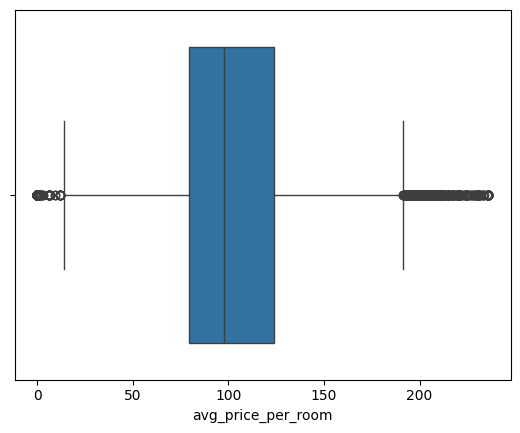

In [51]:
for i in  ['lead_time', 'avg_price_per_room']:
    sns.boxplot(train[i],orient='h')
    plt.show()

In [52]:
x_train = train.drop(columns='booking_status')
y_train = train['booking_status']

In [53]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18655, 11) (3583, 11) (18655,) (3583,)


## Predictive Modeling

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV

In [55]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]

    print('classification Report\n',classification_report(ytest,hard))
    fpr,tpr,th = roc_curve(ytest,soft)
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()

    inp = input('Do you want to save the model in score card? Y/N')
    if inp.lower()=='y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model':mod,
                                  'Accuracy':acc,
                                   'Precision':pre,
                                  'Recall':rec,
                                    'F1 Score':f1,
                                    'Cohen Kappa':ck})
    else:
        return
        

### Logistic Regression

classification Report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.75      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.73      3583
weighted avg       0.78      0.78      0.77      3583



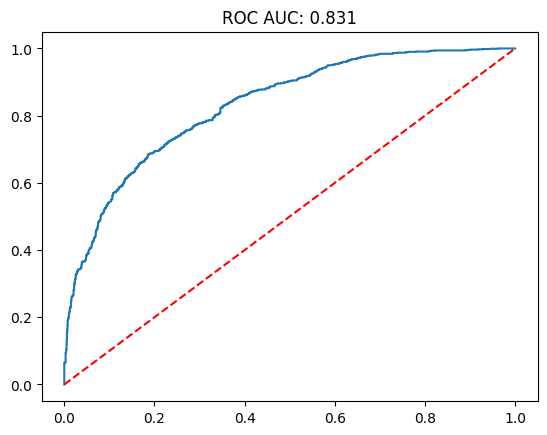

Do you want to save the model in score card? Y/NY


In [58]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [59]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168


### Decison Tree

In [60]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth':[4,5,6,7,8]},
                    cv=5,scoring='f1')

In [61]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8]}, scoring='f1')

In [62]:
gscv.best_score_

0.5754811281604251

In [63]:
gscv.best_params_

{'max_depth': 7}

classification Report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.78      3583
weighted avg       0.80      0.80      0.80      3583



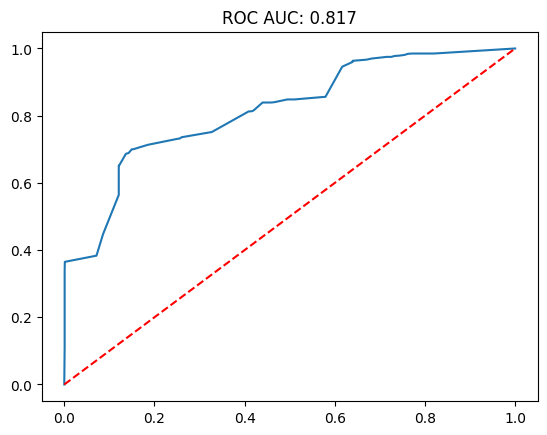

Do you want to save the model in score card? Y/NY


In [64]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),
                 x_train,y_train,x_test,y_test)

In [65]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


### Random Forest

classification Report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2383
           1       0.85      0.65      0.74      1200

    accuracy                           0.85      3583
   macro avg       0.85      0.80      0.82      3583
weighted avg       0.85      0.85      0.84      3583



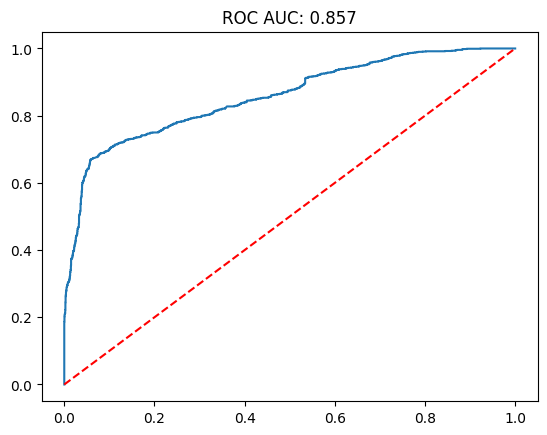

Do you want to save the model in score card? Y/N


In [66]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators=100),
                 x_train,y_train,x_test,y_test)

In [67]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


### Adaboost

classification Report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      2383
           1       0.62      0.79      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.75      3583
weighted avg       0.79      0.77      0.77      3583



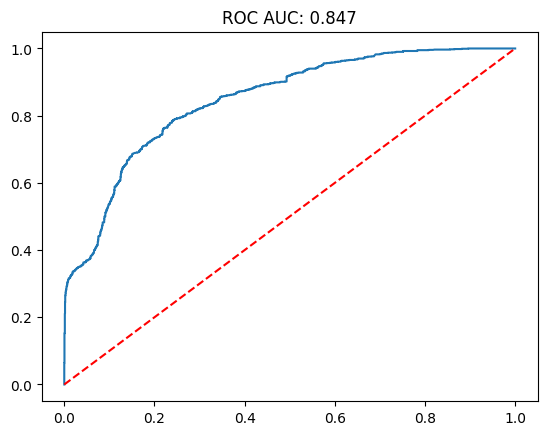

Do you want to save the model in score card? Y/Ny


In [65]:
model_validation(AdaBoostClassifier(n_estimators=120,learning_rate=0.5),
                 x_train,y_train,x_test,y_test)

In [66]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616


### Gradient Boosting

classification Report
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      2383
           1       0.63      0.77      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.76      3583
weighted avg       0.79      0.77      0.78      3583



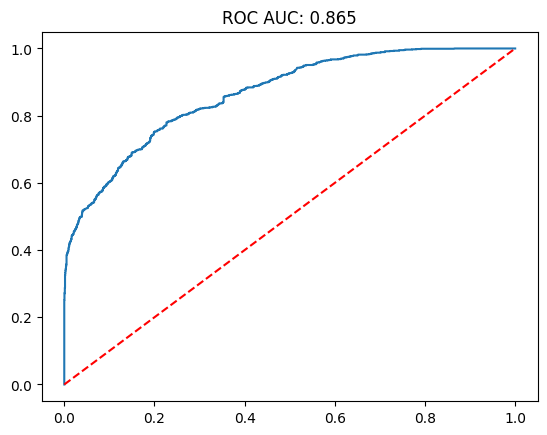

Do you want to save the model in score card? Y/Ny


In [67]:
model_validation(GradientBoostingClassifier(max_depth=6,n_estimators=150),
                 x_train,y_train,x_test,y_test)

In [68]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631651,0.771667,0.694674,0.516636


### XG Boost

classification Report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.80      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



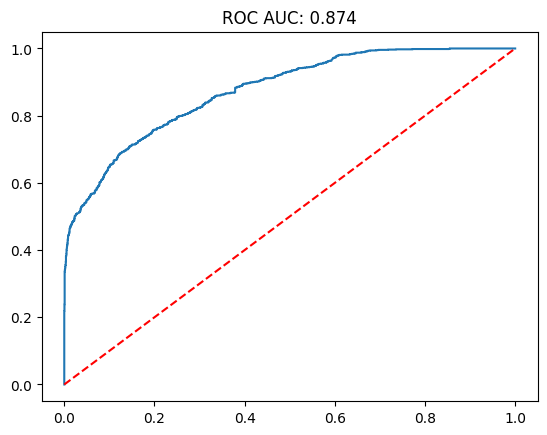

Do you want to save the model in score card? Y/Ny


In [69]:
model_validation(XGBClassifier(n_estimators=120,max_depth=4),
                 x_train,y_train,x_test,y_test)

In [70]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631651,0.771667,0.694674,0.516636
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222


### Voting

In [71]:
base_learners = [('DT_4',DecisionTreeClassifier(max_depth=4)),
                 ('DT_6',DecisionTreeClassifier(max_depth=6)),
                ('RF',RandomForestClassifier(n_estimators=120,max_depth=5)),
                ('XGB',XGBClassifier(max_depth=4,n_estimators=100))]

classification Report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2383
           1       0.75      0.69      0.72      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.79      0.79      3583
weighted avg       0.82      0.82      0.82      3583



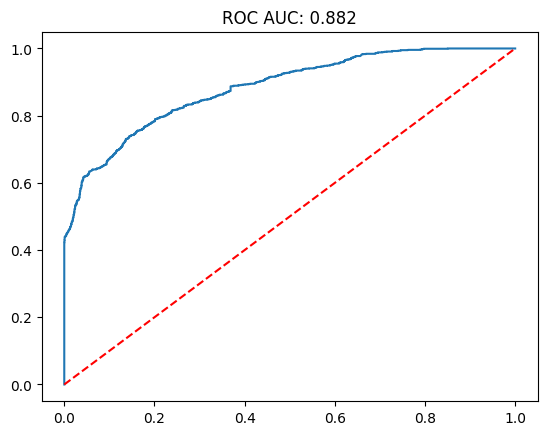

Do you want to save the model in score card? Y/Ny


In [72]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),
                 x_train,y_train,x_test,y_test)

In [73]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631651,0.771667,0.694674,0.516636
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.752727,0.690000,0.720000,0.588021


### Stacking

classification Report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2383
           1       0.85      0.54      0.66      1200

    accuracy                           0.81      3583
   macro avg       0.83      0.75      0.77      3583
weighted avg       0.82      0.81      0.80      3583



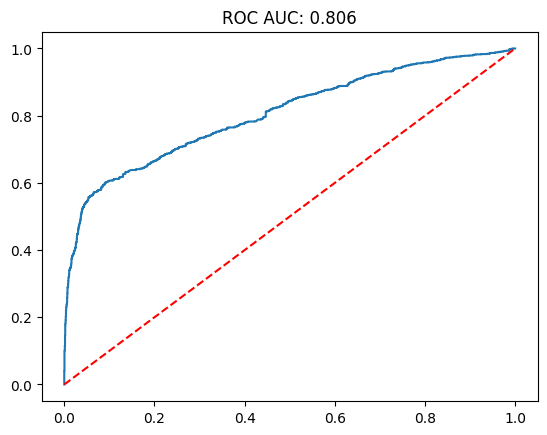

Do you want to save the model in score card? Y/Ny


In [74]:
model_validation(StackingClassifier(estimators=base_learners),
                 x_train,y_train,x_test,y_test)

In [75]:
# Final Score card
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631651,0.771667,0.694674,0.516636
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.752727,0.690000,0.720000,0.588021
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.814401,0.850590,0.540833,0.661233,0.541986


Lets Go with GBM and tune it for final prediction

In [76]:
param = {'n_estimators':[70,100,120,150],
        'learning_rate':[1,0.5,0.1],
        'max_depth':[3,4,5,6,7,8]}

In [77]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,
                    scoring='f1',verbose=1)

In [78]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='f1', verbose=1)

In [79]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}

classification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2383
           1       0.73      0.75      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



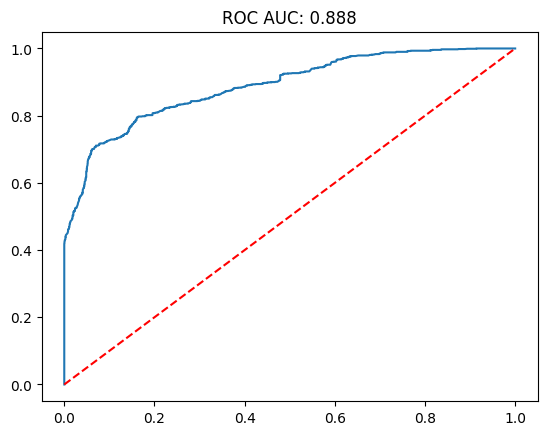

Do you want to save the model in score card? Y/Ny


In [80]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [81]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.848451,0.851337,0.663333,0.745667,0.640090
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.772816,0.631651,0.771667,0.694674,0.516636
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.820262,0.752727,0.690000,0.720000,0.588021
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.814401,0.850590,0.540833,0.661233,0.541986
8,"XGBClassifier(base_score=None, booster=None, c...",0.823053,0.730832,0.746667,0.738664,0.604932


## Final Model

In [82]:
final_model = XGBClassifier(**gscv.best_params_)

In [83]:
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Deployment

In [84]:
# Prediction

In [85]:
x_test.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [86]:
final_model.predict_proba([[10,1,0,170,2,2,1,1,12,4,4]])[:,1][0]

0.14452223

In [87]:
import pickle

In [88]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)

# Conclusion

The analysis successfully highlights the factors contributing to booking cancellations. By building a predictive model, the hotel management can:

Proactively address cancellation risks by offering targeted incentives to at-risk bookings.

Optimize resource allocation and revenue strategies based on predicted cancellations.

Further improvements can be achieved by incorporating additional data, such as customer reviews or competitive pricing trends, to enhance the model's accuracy.

